In [1]:
import os
os.chdir("E:\machine hack\Forest_Cover_participants_Data\Forest_Cover_participants_Data")

### Importing basic package for manipulation and extracting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

### Importing the data

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Checking for Data type and columns details

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29050 entries, 0 to 29049
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Elevation(meters)                           29050 non-null  int64
 1   Aspect(degrees)                             29050 non-null  int64
 2   Slope(degrees)                              29050 non-null  int64
 3   Horizontal_Distance_To_Hydrology(meters)    29050 non-null  int64
 4   Vertical_Distance_To_Hydrology(meters)      29050 non-null  int64
 5   Horizontal_Distance_To_Roadways(meters)     29050 non-null  int64
 6   Hillshade_9am                               29050 non-null  int64
 7   Hillshade_Noon                              29050 non-null  int64
 8   Hillshade_3pm                               29050 non-null  int64
 9   Horizontal_Distance_To_Fire_Points(meters)  29050 non-null  int64
 10  Wilderness_Area_1                 

### For viewing full columns, setting max_columns option

In [5]:
pd.set_option('display.max_columns',73)

In [6]:
train.describe()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.0,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000
mean,2959.328330,155.720241,14.028537,269.220792,46.332737,2346.340241,212.042134,223.446850,142.854630,1971.574871,0.450843,0.050327,0.435422,0.063408,0.004819,0.011945,0.007917,0.021480,0.002719,0.012771,0.000310,0.000516,0.001997,0.055077,0.020861,0.051566,0.030809,0.001170,0.0,0.004750,0.006231,0.003305,0.006850,0.017005,0.001274,0.057212,0.097074,0.036730,0.000585,0.004303,0.001824,0.001824,0.200172,0.051842,0.042065,0.091738,0.078967,0.002719,0.003064,0.000207,0.000379,0.027539,0.023821,0.014561,5.536110
std,277.578227,112.109417,7.458200,212.406921,58.938186,1558.148732,26.678889,19.610671,38.000582,1321.145310,0.497586,0.218623,0.495821,0.243699,0.069255,0.108640,0.088628,0.144981,0.052078,0.112287,0.017599,0.022718,0.044639,0.228135,0.142920,0.221153,0.172803,0.034192,0.0,0.068761,0.078689,0.057392,0.082484,0.129293,0.035666,0.232251,0.296064,0.188101,0.024184,0.065457,0.042675,0.042675,0.400136,0.221711,0.200742,0.288661,0.269692,0.052078,0.055267,0.014370,0.019456,0.163650,0.152494,0.119790,1.438261
min,1879.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,58.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,120.000000,1020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2995.000000,128.000000,13.000000,218.000000,29.000000,1984.000000,218.000000,226.000000,143.000000,1704.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

### Checking for Null values

In [7]:
train.isnull().sum()/train.count()

Elevation(meters)                             0.0
Aspect(degrees)                               0.0
Slope(degrees)                                0.0
Horizontal_Distance_To_Hydrology(meters)      0.0
Vertical_Distance_To_Hydrology(meters)        0.0
Horizontal_Distance_To_Roadways(meters)       0.0
Hillshade_9am                                 0.0
Hillshade_Noon                                0.0
Hillshade_3pm                                 0.0
Horizontal_Distance_To_Fire_Points(meters)    0.0
Wilderness_Area_1                             0.0
Wilderness_Area_2                             0.0
Wilderness_Area_3                             0.0
Wilderness_Area_4                             0.0
Soil_Type_1                                   0.0
Soil_Type_2                                   0.0
Soil_Type_3                                   0.0
Soil_Type_4                                   0.0
Soil_Type_5                                   0.0
Soil_Type_6                                   0.0


### Checking for Unique values and Data Imbalance

In [8]:
np.unique(train['Cover_Type'],return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([ 1025,   475,   868,   137, 14165,  1788, 10592], dtype=int64))

In [9]:
import seaborn as sns

### Checking distribution among the variables

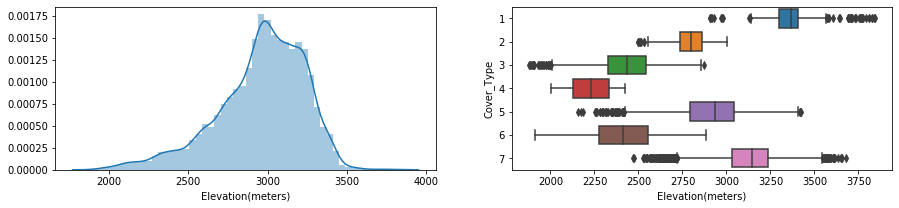

In [10]:
f,(a,b)=plt.subplots(nrows=1,ncols=2,figsize=(15,3))
sns.distplot(train['Elevation(meters)'],kde=True,ax=a)
sns.boxplot(y='Cover_Type',x='Elevation(meters)',data=train,orient='h',ax=b)

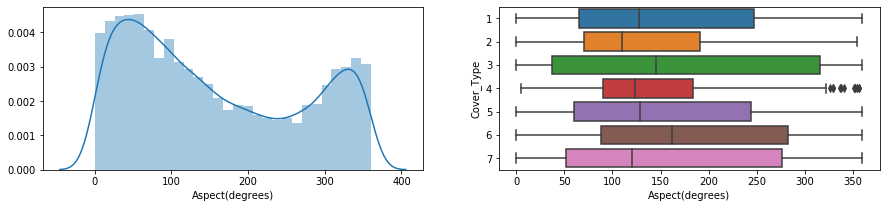

In [11]:
f,(a,b)=plt.subplots(nrows=1,ncols=2,figsize=(15,3))
sns.distplot(train['Aspect(degrees)'],kde=True,ax=a)
sns.boxplot(y='Cover_Type',x='Aspect(degrees)',data=train,orient='h',ax=b)

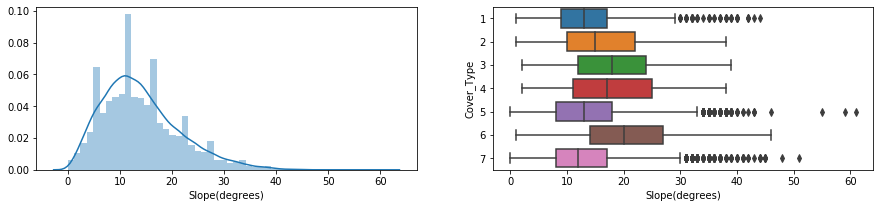

In [12]:
f,(a,b)=plt.subplots(nrows=1,ncols=2,figsize=(15,3))
sns.distplot(train['Slope(degrees)'],kde=True,ax=a)
sns.boxplot(y='Cover_Type',x='Slope(degrees)',data=train,orient='h',ax=b)

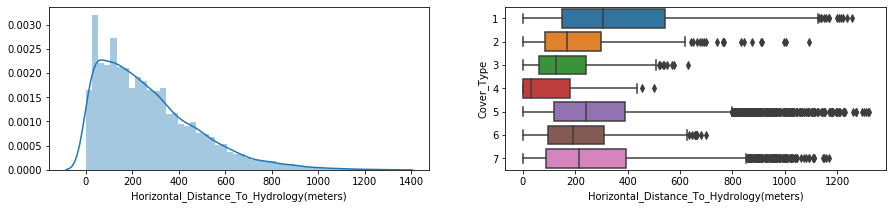

In [13]:
f,(a,b)=plt.subplots(nrows=1,ncols=2,figsize=(15,3))
sns.distplot(train['Horizontal_Distance_To_Hydrology(meters)'],kde=True,ax=a)
sns.boxplot(y='Cover_Type',x='Horizontal_Distance_To_Hydrology(meters)',data=train,orient='h',ax=b)

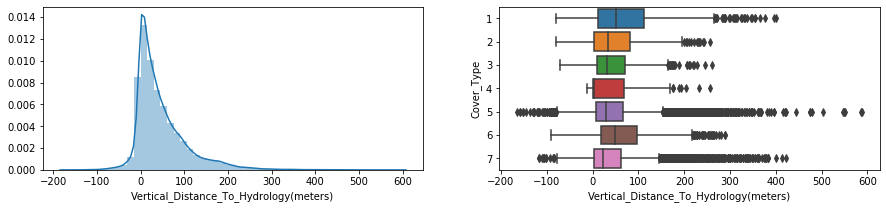

In [14]:
f,(a,b)=plt.subplots(nrows=1,ncols=2,figsize=(15,3))
sns.distplot(train['Vertical_Distance_To_Hydrology(meters)'],kde=True,ax=a)
sns.boxplot(y='Cover_Type',x='Vertical_Distance_To_Hydrology(meters)',data=train,orient='h',ax=b)

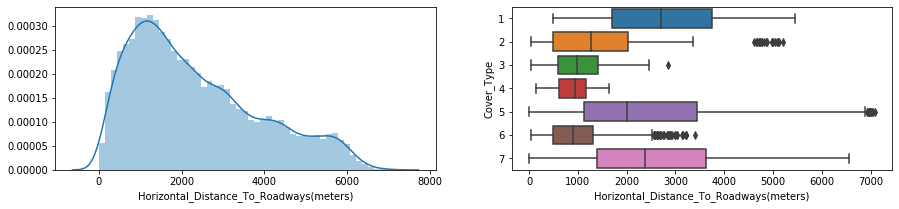

In [15]:
f,(a,b)=plt.subplots(nrows=1,ncols=2,figsize=(15,3))
sns.distplot(train['Horizontal_Distance_To_Roadways(meters)'],kde=True,ax=a)
sns.boxplot(y='Cover_Type',x='Horizontal_Distance_To_Roadways(meters)',data=train,orient='h',ax=b)

In [16]:
#plt.figure(figsize=(20,20))
#sns.heatmap(train.corr(),annot=True)

C:\Users\santhosh\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


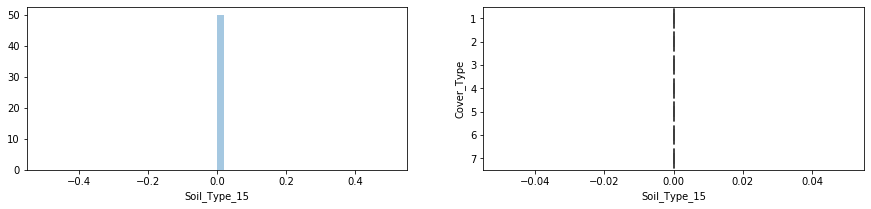

In [17]:
f,(a,b)=plt.subplots(nrows=1,ncols=2,figsize=(15,3))
sns.distplot(train['Soil_Type_15'],kde=True,ax=a)
sns.boxplot(y='Cover_Type',x='Soil_Type_15',data=train,orient='h',ax=b)

### Dropping 'Soil_Type_15', it doesnt contribute to feautres

In [18]:
train.drop(['Soil_Type_15'],axis=1,inplace=True)

In [19]:
test.drop(['Soil_Type_15'],axis=1,inplace=True)

### Feature Engineering Categorial and Numerical in Train & Test Data

In [21]:
categorical = []
for col, value in train.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

In [22]:
numerical = train.columns.difference(categorical)

In [63]:
categorical_t = []
for col, value in test.iteritems():
    if value.dtype == 'object':
        categorical_t.append(col)

In [64]:
numerical_t = test.columns.difference(categorical_t)

In [23]:
train_cat = train[categorical]

In [65]:
test_cat = test[categorical_t]

In [24]:
train_num = train[numerical]

In [66]:
test_num = test[numerical_t]

### Data is skewed, used Standard Scaler method to standarized the numerical variable

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaled_d = scaler.fit_transform(train_num)
scaled_df = pd.DataFrame(scaled_d,columns=train_num.columns)
scaled_df.shape

(29050, 54)

In [67]:
scaled_t = scaler.fit_transform(test_num)
scaled_tf = pd.DataFrame(scaled_t,columns=test_num.columns)
scaled_tf.shape

(551962, 53)

In [28]:
train_f = pd.concat([scaled_df,train_cat],axis=1)

In [72]:
test_f = pd.concat([scaled_tf,test_cat],axis=1)
print(test_f.shape)

(551962, 53)


In [29]:
y = train['Cover_Type']

In [30]:
y.head()

0    5
1    7
2    5
3    7
4    7
Name: Cover_Type, dtype: int64

In [31]:
X = train_f

In [32]:
X.drop(['Cover_Type'],axis=1,inplace=True)

In [33]:
print(X.shape)

(29050, 53)


In [34]:
y.shape

(29050,)

### Splitting the train data into train & test with 25% of test_size

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.25,random_state=1)

In [37]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(21787, 53)
(21787,)
(7263, 53)
(7263,)


### For balancing the data used SMOTE to balance

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
os = SMOTE(random_state=1)

In [40]:
train_X_reshape,train_y_reshape = os.fit_sample(train_X,train_y)

In [41]:
test_X_reshape,test_y_reshape = os.fit_sample(test_X,test_y)

### Model Building

In [46]:
#Libaries for Model Building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Libaries for Model Fine tuning
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RepeatedStratifiedKFold

#Libaries for Model Evaluation
from sklearn import metrics as m 

### First try run will use 4 classifier model to identify the best model

In [59]:
def run_models(train_X_reshape, train_y_reshape, test_X_reshape, test_y_reshape, model_type = 'balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(multi_class='ovr',max_iter=1000),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
             'CART': DecisionTreeClassifier(max_depth = 4)
            }
    cols = ['model', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(train_X_reshape, train_y_reshape)

        y_pred = clf.predict(test_X_reshape)
        y_score = clf.predict_proba(test_X_reshape)

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : m.roc_auc_score(test_y_reshape, y_score,average = 'macro',multi_class = 'ovr'),
                         'precision_score': m.precision_score(test_y_reshape, y_pred,average='macro'),
                         'recall_score': m.recall_score(test_y_reshape, y_pred,average='macro'),
                         'f1_score': m.f1_score(test_y_reshape, y_pred,average='macro')})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(test_y_reshape, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        

            
    return models_report, conf_matrix

In [60]:
models_report, conf_matrix = run_models(train_X_reshape, train_y_reshape, test_X_reshape, test_y_reshape, model_type = 'balanced')

computing GradientBoosting - balanced 
computing LogisticRegression - balanced 
computing RandomForestClassifier - balanced 
computing CART - balanced 


In [61]:
models_report

,model,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.981407,0.834271,0.825392,0.827399,balanced
1,LogisticRegression,0.938545,0.665674,0.666283,0.665078,balanced
2,RandomForestClassifier,0.968327,0.824297,0.803116,0.807225,balanced
3,CART,0.922779,0.646634,0.657959,0.643264,balanced


### GradientBoosting provides higher recall_Score, will choose this model and use hyper tuning for increasing in accuracy

In [81]:
GB = GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3)

In [82]:
GB.fit(train_X_reshape, train_y_reshape)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [83]:
GB_pred = GB.predict(test_X_reshape)

In [84]:
m.accuracy_score(test_y_reshape,GB.predict(test_X_reshape))

0.8200808625336927

In [85]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [87]:
cm = confusion_matrix(test_y_reshape,GB.predict(test_X_reshape))

In [88]:
import seaborn as sns

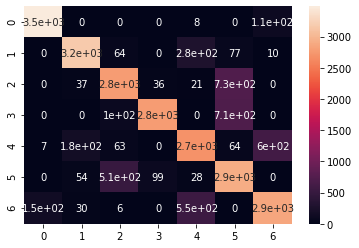

In [89]:
sns.heatmap(cm,annot=True)

In [90]:
print(classification_report(test_y_reshape,GB.predict(test_X_reshape)))

              precision    recall  f1-score   support

           1       0.96      0.97      0.96      3604
           2       0.91      0.88      0.90      3604
           3       0.79      0.77      0.78      3604
           4       0.95      0.77      0.85      3604
           5       0.75      0.75      0.75      3604
           6       0.65      0.81      0.72      3604
           7       0.80      0.79      0.80      3604

    accuracy                           0.82     25228
   macro avg       0.83      0.82      0.82     25228
weighted avg       0.83      0.82      0.82     25228



In [91]:
predictions = GB.predict(test_f)

In [115]:
# Scatter plot 
trace = go.Scatter(
    y = GB.feature_importances_,
    x = train_f.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = GB.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = train_f.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

In [99]:
Prediction_GB = pd.DataFrame(predictions,columns=['re'])
Prediction_GB

,re
0,5
1,1
2,6
3,2
4,5
...,...
551957,7
551958,7
551959,2
551960,7


In [96]:
prob = GB.predict_proba(test_f)

In [100]:
result = pd.DataFrame(prob,columns=[1,2,3,4,5,6,7])
result

,1,2,3,4,5,6,7
0,0.000260,0.007959,0.000897,0.000067,0.937849,0.001055,0.051913
1,0.927899,0.001202,0.000351,0.000038,0.007677,0.000774,0.062059
2,0.000378,0.056424,0.022101,0.000104,0.442165,0.469208,0.009621
3,0.000942,0.588684,0.006545,0.000224,0.325728,0.006099,0.071777
4,0.001377,0.078159,0.006884,0.000423,0.702362,0.029970,0.180825
...,...,...,...,...,...,...,...
551957,0.152662,0.004467,0.002043,0.000163,0.395003,0.002297,0.443366
551958,0.070290,0.004278,0.001940,0.000087,0.161091,0.001752,0.760562
551959,0.000342,0.821627,0.002650,0.000115,0.117419,0.002194,0.055651
551960,0.000464,0.002500,0.002091,0.000085,0.416982,0.001789,0.576089


In [106]:
result.to_csv('E:\project\submission.csv',index=False,header=True)